In [1]:
import uproot

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import seaborn as sn
from tqdm import tqdm

import numpy as np
from numpy import array, where, shape, reshape, pi, cos, sin, sqrt, linspace
np.set_printoptions(threshold=1000)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
def hist2D(x_var, y_var, bins, xtitle, ytitle, weights):
    plt.figure(figsize=(8,6))
    sn.histplot(x = x_var, y = y_var, bins = bins, weights = weights)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    #plt.xlim(-800,500)
    plt.show()

# 1 Extraer Información

In [3]:
file = uproot.open("/sno/py_out1.root")

## 1.1) Event Info.

In [4]:
data1 = file['T;7']
data1.keys()

['evtid',
 'mc_position',
 'mc_momentum',
 'position',
 'momentum',
 'hit_pmtid',
 'hit_pmttime',
 'hit_residual',
 'hit_type']

In [5]:
evtid = np.array(data1['evtid'])
mc_position = np.array(data1['mc_position'])
position = np.array(data1['position'])
hit_pmtid = np.array(data1['hit_pmtid'])
hit_pmttime = np.array(data1['hit_pmttime'])
hit_residual = np.array(data1['hit_residual'])
hit_type = np.array(data1['hit_type'])

## 1.2) PMT Info.

In [6]:
pmt_info = file['pmt;1']
pmt_info.keys()

['pmt_id', 'pmt_pos_xyz', 'pmt_pos_sph', 'pmt_type']

In [7]:
pmt_id = array(pmt_info['pmt_id'])
pmt_pos_xyz = array(pmt_info['pmt_pos_xyz'])
pmt_pos_sph = array(pmt_info['pmt_pos_sph'])
pmt_type = array(pmt_info['pmt_type'])

In [8]:
#Lets separate their coordinates
#xyz:

prefix_xyz = 'type_'
suffix_xyz = '_xyz'

type_var = np.unique(pmt_type)

for i in type_var:
    condition = (pmt_type == i)
    locals()[prefix_xyz + str(i) + suffix_xyz] = []
    
    for j in (where(condition)[0]):
        locals()[prefix_xyz + str(i) + suffix_xyz].append(pmt_pos_xyz[j])
    locals()[prefix_xyz + str(i) + suffix_xyz] = np.array(locals()[prefix_xyz + str(i) + suffix_xyz])
    
#spherical:

prefix_sph = 'type_'
suffix_sph = '_sph'

type_var = np.unique(pmt_type)

for i in type_var:
    condition = (pmt_type == i)
    locals()[prefix_sph + str(i) + suffix_sph] = []
    
    for j in (where(condition)[0]):
        locals()[prefix_sph + str(i) + suffix_sph].append(pmt_pos_sph[j])
    locals()[prefix_sph + str(i) + suffix_sph] = np.array(locals()[prefix_sph + str(i) + suffix_sph])

In [9]:
type_1_xyz

array([[ 5467.54,    63.44, -6406.27],
       [ 5615.16,   266.8 , -6251.09],
       [ 5762.73,   469.91, -6095.92],
       ...,
       [ 6275.45, -5446.47,  1161.1 ],
       [ 5941.19, -5754.32,  1395.85],
       [ 6078.68, -5666.4 ,  1149.76]])

In [10]:
type_1_sph

array([[ 2.43505602e+00,  1.16025037e-02,  8.42248856e+03],
       [ 2.40917419e+00,  4.74785216e-02,  8.40698104e+03],
       [ 2.38262954e+00,  8.13629337e-02,  8.40179226e+03],
       ...,
       [ 1.43196114e+00, -7.14795215e-01,  8.39008113e+03],
       [ 1.40360795e+00, -7.69421596e-01,  8.38798751e+03],
       [ 1.43331289e+00, -7.50310212e-01,  8.38930197e+03]])

## Radial distribution of PMT type = 1

Text(0, 0.5, 'radius')

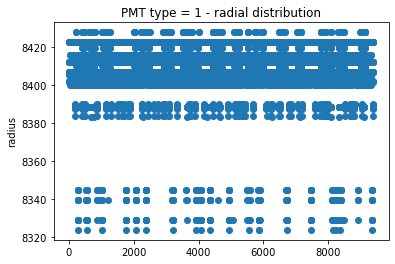

In [11]:
radius = type_1_sph[:,2]
plt.plot(radius,'o')
plt.title('PMT type = 1 - radial distribution')
plt.ylabel('radius')

## Angular distribution of all PMTs type = 1

In [25]:
zenith = type_1_sph[:,0]
azimut = type_1_sph[:,1]

plt.hist2d(x = np.cos(zenith), y = azimut, bins = [100,100], density = True)
plt.ylabel('azimuth')
plt.xlabel('cos(zenith)')
plt.title('PMT map')
plt.colorbar()
plt.show()

### 1.2.1) PMT postion vs. Vesel - 3D plot visualización

In [84]:
%matplotlib

#Add points - PMT coords!

type_x = type_1_xyz[:,0]
type_y = type_1_xyz[:,1]
type_z = type_1_xyz[:,2]

fig = plt.figure(figsize = (10,10))

# Parámetros para crear la esfera
r = 6000  # Radio de la esfera
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Coordenadas cartesianas para la esfera
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# Configuración de la figura 3D
ax = fig.add_subplot(projection='3d')

# Graficar la esfera vs. coordenadas de PMTs
ax.scatter(type_x, type_y, type_z, c = 'r', s = 1, label = 'PMT')
ax.plot_wireframe(x, y, z, alpha=0.5, color = 'blue',label = 'VESEL')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Mostrar la gráfica
plt.show()

Using matplotlib backend: Qt5Agg


# 2) Dividir the 3S en pixeles

### IMPORTANTE OBSERVAR
- Cenital minimo de pmt spherical type 1

In [11]:
zenit_minimal = np.min(type_1_sph[:,0])
zenit_minimal

0.1572726015543194

- radio medio de PMTs type 1

Tiene sentido extraer un radio médio? Observa solo la distribución radial de PMTs... no parece ser accidental:

In [13]:
plt.plot(type_1_sph[:,2], 'o')

In [14]:
r_med = np.average(type_1_sph[:,2])
r_med

8406.882920133025

### 2.1) Modelaje de cortes de secciones vs. posiciones de PMTs

In [15]:
#Angle Division
zenit_div = 20
azimut_div = 40
r = r_med  # Radio de la esfera

#Angle generation
zenit = np.linspace(zenit_minimal, pi - zenit_minimal, zenit_div+1)
azimut = np.linspace(-pi, pi, azimut_div+1)
zenit_grid, azimut_grid = np.meshgrid(zenit, azimut)

#GRAFICO

# x = r * np.sin(zenit_grid) * np.cos(azimut_grid)
# y = r * np.sin(zenit_grid) * np.sin(azimut_grid)
# z = r * np.cos(zenit_grid)

# fig = plt.figure(figsize = (20,20))
# ax = fig.add_subplot(projection='3d')
# ax.plot_wireframe(x, y, z, alpha=1, color = 'k',label = 'Division')
# ax.scatter(type_x, type_y, type_z, c = 'r', s = 2, label = 'PMT')

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.legend()

# ax.axes.set_xlim3d(left=-9000, right=9000) 
# ax.axes.set_ylim3d(bottom=-9000, top=9000) 
# ax.axes.set_zlim3d(bottom=-9000, top=9000) 

# plt.show()

#### IMPORTANTE: Nº medio de PMTs por píxel (usando las divisiones de arriba)

In [16]:
#PMT counting per unit of solid angels (d_zenit x d_azimut)r^2
zenit_div = 20
azimut_div = 40

zenit = np.linspace(zenit_minimal, pi - zenit_minimal, zenit_div+1)
azimut = np.linspace(-pi, pi, azimut_div+1)

dN_pmt = np.array([], dtype = np.int64)                                           #acumulated amout of PMTs in an angular division
d_sigma_pmt = np.array([])                                                        # Density of dN_pmt per unit of area (1/(mm^-3))

size = shape(type_1_sph)[0]

for i in range(zenit_div):
    d_zenit = zenit[i:i+2]                                                      #2x1 array
        
    for j in range(azimut_div):
        pmt_count = 0                                                             # Nº of pmt in angular region
        d_azimut = azimut[j:j+2]                                                    #2x1 array
        #A = (d_azimut[1] - d_azimut[0])*(d_zenit[1]-d_zenit[0])*(r_med**2)        # Area of angular region
        #print(A)
        
        for k in range(size):
            zenit_pmt = type_1_sph[k][0]
            azimut_pmt = type_1_sph[k][1]
            #print(d_zenit)
            
            if (zenit_pmt > d_zenit[0] and zenit_pmt <= d_zenit[1]) and (
                azimut_pmt >= d_azimut[0] and azimut_pmt <= d_azimut[1]):
                pmt_count += 1
        
        #PMT number in this region
        dN_pmt = np.append(dN_pmt, pmt_count)
        
        #PMT density in this region,
        #d_sigma_pmt = np.append(d_sigma_pmt, (pre_count)/(A))      

In [17]:
dN_pmt

array([ 3,  5,  3,  3,  4,  3,  3,  4,  3,  5,  2,  3,  4,  3,  2,  4,  3,
        5,  3,  3,  4,  3,  3,  4,  3,  5,  3,  3,  4,  3,  3,  4,  3,  5,
        3,  2,  4,  3,  3,  4,  7,  6,  8,  7,  5,  7,  6,  5,  7,  6,  8,
        7,  5,  6,  7,  5,  7,  6,  8,  7,  5,  7,  6,  5,  7,  6,  8,  7,
        5,  7,  6,  5,  7,  6,  8,  7,  5,  7,  6,  5,  8,  7,  7,  8,  9,
        9,  9,  9,  8,  7,  7,  8,  9,  9,  9,  9,  8,  7,  7,  8,  9,  9,
        9,  8,  8,  7,  7,  8,  9,  9,  9,  9,  8,  7,  7,  8,  8,  9,  9,
        9,  9, 13, 14,  9,  9, 10, 11,  9,  9, 13, 14,  9,  9, 10, 11,  9,
        9, 13, 14,  9,  9, 10, 11,  9,  9, 13, 14,  9,  9, 10, 11,  9,  9,
       13, 14,  9,  9, 10, 11,  9,  9,  9,  8,  9, 11, 12, 12, 11,  9,  9,
        9,  9, 11, 12, 12, 11,  9,  9,  9,  9, 11, 13, 11, 11,  9,  9,  9,
        9, 11, 12, 12, 11,  9,  9,  9,  9, 11, 11, 12, 11, 14, 18, 16, 14,
       13, 15, 15, 13, 14, 18, 16, 14, 13, 15, 15, 13, 14, 18, 16, 14, 13,
       15, 15, 13, 14, 18

In [18]:
len(dN_pmt)

800

Ejemplo de como deberia ser una iteración de gráfico en el mismo eje.

In [19]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

x = array([[1,2],[2,1]])
y= 2*x
z = x

for i in range(2):
    ax.scatter(x[i], y[i] , z[i], c = 'r', s = 5)
plt.show()

# 3) Dividir estructura de soporte de PMT 

### 3.1) Primera prueba: Dividir en 4 partes

$\theta  -> \theta/2$ y $\phi -> \phi/4$

In [14]:
#1st sector: usar función coseno para evitar problemas de angulos negativos-> (estos existen en la base de datos de los PMTs)

first_sector_i = []
first_sector_xyz = []


size = shape(type_1_sph)[0]

for i in range(size):
    
    #cos_azimut = cos(type_1_sph[i][0])
    #cos_polar = cos(type_1_sph[i][1])
    zenit = type_1_sph[i][0]
    azimut = type_1_sph[i][1]
    
    #choose the sector
    if (zenit >= 0 and azimut <= pi) and (azimut >= -pi and azimut <= pi):
        first_sector_xyz.append(type_1_xyz[i])
        
first_sector_xyz = np.array(first_sector_xyz)

(-8000.0, 8000.0)

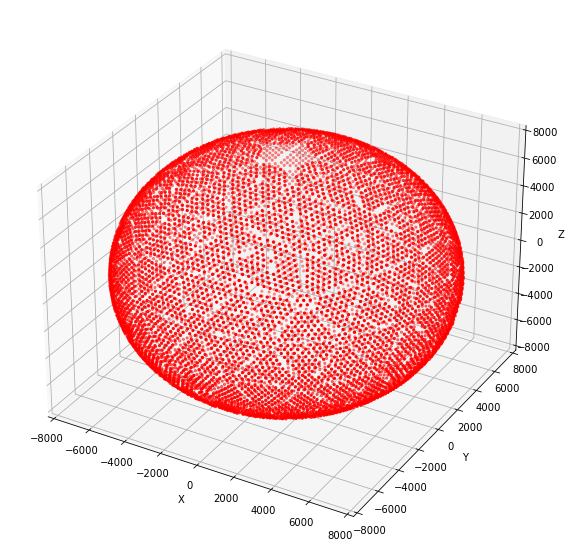

In [15]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

x = first_sector_xyz[:,0]
y = first_sector_xyz[:,1]
z = first_sector_xyz[:,2]

ax.scatter(x, y, z, c = 'r', s = 5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.legend()

ax.axes.set_xlim3d(left=-8000, right=8000) 
ax.axes.set_ylim3d(bottom=-8000, top=8000) 
ax.axes.set_zlim3d(bottom=-8000, top=8000)

In [22]:
type_1_sph

array([[ 2.43505602e+00,  1.16025037e-02,  8.42248856e+03],
       [ 2.40917419e+00,  4.74785216e-02,  8.40698104e+03],
       [ 2.38262954e+00,  8.13629337e-02,  8.40179226e+03],
       ...,
       [ 1.43196114e+00, -7.14795215e-01,  8.39008113e+03],
       [ 1.40360795e+00, -7.69421596e-01,  8.38798751e+03],
       [ 1.43331289e+00, -7.50310212e-01,  8.38930197e+03]])

## 3.1) División completa en píxeles

---------------------

##### Concepto

In [47]:
#Como dividir los angulos en secciones cuadradas?
# división cuadrada: azimuth/n -> phi/(2n)

n = 3                      # nº de subintervalos deseados
a = linspace(0,1, 1+n)     # 

In [54]:
a

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [64]:
a[0:2]

array([0.        , 0.33333333])

In [63]:
#Divisón en subintervalos

for i in range(n):
    sub = a[i:i+2]
    print(sub)

[0.         0.33333333]
[0.33333333 0.66666667]
[0.66666667 1.        ]


---------------------

## 3.2) Selección angular de regiones de PMTs (MUY LENTO A CORRER!)

In [256]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()


#División de angulos:
zenit_div = 2
azimut_div = 2

#probar primero con el 1er sector
zenit_lim = pi
azimut_lim = pi

zenit = linspace(0, zenit_lim, zenit_div + 1)
azimut = linspace(-pi, azimut_lim, azimut_div + 1)

size = shape(type_1_sph)[0]
colors = ['b', 'r', 'g']

#extraer sub-intervalos y hacer corresponder PMTs
for k in range(size):
    sector_xyz = []
    zenit_pmt = type_1_sph[k][0]
    azimut_pmt = type_1_sph[k][1]
    
    #1st, construct pixels in azimuth angel keeping zenith const.
    for i in range(zenit_div):
        #color_counter = 0
        d_zenit = zenit[i:i+2]                   #2x1 array
        
        for j in range(azimut_div):
            d_azimut = azimut[j:j+2]             #2x1 array
            
            #compare subinterval limits and PMT angles
            if (zenit_pmt > d_zenit[0] and zenit_pmt <= d_zenit[1]) and (azimut_pmt >= d_azimut[0] and azimut_pmt <= d_azimut[1]):
                sector_xyz.append(type_1_xyz[k])
                array_sector_xyz = np.array(sector_xyz)
                
                x = array_sector_xyz[:,0]
                y = array_sector_xyz[:,1]
                z = array_sector_xyz[:,2]
                #color_counter += 1
                #print(color_counter)
                
                #ax.scatter(x, y, z, c = colors[i+j], s = 1)
                ax.scatter(x, y, z, c = 'r', s = 1)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# #ax.legend()

# ax.axes.set_xlim3d(left=-8000, right=8000) 
# ax.axes.set_ylim3d(bottom=-8000, top=8000) 
# ax.axes.set_zlim3d(bottom=-8000, top=8000)

In [24]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

#Lower and upper angle limits
azimut_lim = [0, pi/2]
zenit_lim = [0, pi/2]

#Angle divisions
zenit_div = 2
azimut_div = 2

zenit = np.linspace(zenit_lim[0] , zenit_lim[1] - zenit_minimal, zenit_div+1)
azimut = np.linspace(azimut_lim[0], azimut_lim[1], azimut_div+1)

size = shape(type_1_sph)[0]
colors = ['b', 'r', 'g']

for i in range(zenit_div):
    d_zenit = zenit[i:i+2]                                                         #2x1 array
        
    for j in range(azimut_div):
        pmt_count = 0                                                              # Nº of pmt in angular region
        d_azimut = azimut[j:j+2]                                                   #2x1 array
        
        for k in range(size):
            zenit_pmt = type_1_sph[k][0]
            azimut_pmt = type_1_sph[k][1]
            sector_xyz = []
            
            if (zenit_pmt > d_zenit[0] and zenit_pmt <= d_zenit[1]) and (
                azimut_pmt >= d_azimut[0] and azimut_pmt <= d_azimut[1]):
                
                sector_xyz.append(type_1_xyz[k])
                array_sector_xyz = np.array(sector_xyz)
                
                x = array_sector_xyz[:,0]
                y = array_sector_xyz[:,1]
                z = array_sector_xyz[:,2]
                #color_counter += 1
                #print(color_counter)
                
                ax.scatter(x, y, z, c = colors[i+j], s = 1)
                #ax.scatter(x, y, z, c = 'r', s = 1)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# #ax.legend()

# ax.axes.set_xlim3d(left=-8000, right=8000) 
# ax.axes.set_ylim3d(bottom=-8000, top=8000) 
# ax.axes.set_zlim3d(bottom=-8000, top=8000)

In [253]:
size

9390

------------------

### Matplotlib Colors

In [142]:
mcolors.BASE_COLORS

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}

In [145]:
mcolors.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3